<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#인공신경망" data-toc-modified-id="인공신경망-15.4"><span class="toc-item-num">15.4&nbsp;&nbsp;</span>인공신경망</a></span><ul class="toc-item"><li><span><a href="#특징" data-toc-modified-id="특징-15.4.1"><span class="toc-item-num">15.4.1&nbsp;&nbsp;</span>특징</a></span></li><li><span><a href="#sklearn.neural_network.MLPClassifier" data-toc-modified-id="sklearn.neural_network.MLPClassifier-15.4.2"><span class="toc-item-num">15.4.2&nbsp;&nbsp;</span>sklearn.neural_network.MLPClassifier</a></span></li><li><span><a href="#조정-할만한-매개변수" data-toc-modified-id="조정-할만한-매개변수-15.4.3"><span class="toc-item-num">15.4.3&nbsp;&nbsp;</span>조정 할만한 매개변수</a></span></li></ul></li></ul></div>


## 인공신경망

### 특징

- 인공신경망 모형은 동물의 뇌신경계를 모방하여 분류 또는 예측하기 위해 만들어진 모형이다. 인공신경망에서는 입력(inputs)은 인간의 뇌의 시냅스에 해당하며 개별 신호의 강도에 따라 가중(weight)되며, 활성 함수(activation function)는 인공신경망의 출력(outputs)을 계산한다. 
- 인공신경망은 <b>가중치를 반복적으로 조정하며 학습</b>하며 뉴런들은 링크(link)로 연결되어 있고, 각 링크에는 수치적인 가중치가 있다. 인공신경망은 신경망의 가중치를 초기화하고 훈련 데이터를 통해 가중치를 갱신하여 신경망의 구조를 선택하고, 활용할 학습 알고리즘을 결정한 후 신경망을 훈련시킨다. 

<b>가. 구조</b> <br> 
- 입력 링크에서 여러 신호를 받아서 새로운 활성화 수준을 계산하고, 출력 링크로 출력 신호를 보낸다. 
- 입력신호는 미가공 데이터 또는 다른 뉴런으로 출력이 될 수 있으며, 출력신호는 문제의 최종적인 해(solution)가 되거나 다른 뉴런에 입력 될 수 있다. 

<img src='./인공신경망.png' width=500/>

<b>나. 뉴런의 계산 </b> <br> 

- 뉴런은 전이함수, 즉 활성화 함수(activation function)를 사용하며, 활성화 함수를 이용해 출력을 결정하며 입력신호의 가중치 합을 계산하여 임계값과 비교한다. 
- 가중치 합이 임계값보다 작으면 뉴런의 출력은 -1, 같거나 크면 +1을 출력한다. 

<b>다. 뉴런의 활성화 함수</b> <br>
- 시그모이드 함수의 경우 로지스틱 회귀분석과 유사하며, 0~1의 확률값을 가진다. 

- softmax함수 : 표준화지수 함수로도 불리며, 출력값이 여러 개로 주어지고 목표치가 다범주인 경우 각 범주에 속할 사후확률을 제공하는 함수이다. 

- Relu함수 : 입력값이 0이하는 0, 0초과는 x값을 가지는 함수이며, 최근 딥러닝에서 많이 활용하는 함수이다. 

### sklearn.neural_network.MLPClassifier
> class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

### 조정 할만한 매개변수
1)  hidden_layer_sizes
> tuple, length = n_layers - 2, default=(100,)

2) activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

> ‘identity’, 선형함수
‘logistic’, 시그모이드 함수 f(x) = 1 / (1 + exp(-x)) 값을 리턴함 <br>
 ‘tanh’, 탄젠트 함수  returns f(x) = tanh(x). <br>
‘relu’, 수정된 선형 함수 0이하는 0, 0이상은 x, returns f(x) = max(0, x) <br>


3)  solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

> ‘lbfgs’ quasi-Newton 방법( 0 또는 함수의 극대값과 극소값을 찾는 데 사용되는 방법) 계열의 최적화 도구  <br>
‘sgd’ 경사하강법. <br> <br>
‘adam’ 확률적 기울기 기반 옵티마이저  <br>
 큰 데이터 셋 : adam (수천 개 이상의 훈련 샘플 데이터)   <br>
 작은 데이터 셋 : lbfgs

<b>[예제]</b><br>credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을분류하는 인공신경망 모델 만들어라

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("../data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
133,3,18,2,3,1453,1,1,3,1,1,1,1,26,2,2,1,3,1,1,1
464,2,12,2,4,7472,4,1,1,1,1,2,1,24,2,1,1,1,1,1,1
919,1,48,3,1,6331,1,4,4,3,1,4,4,46,2,3,2,3,1,2,1
865,3,15,3,3,1271,4,2,3,3,1,4,4,39,2,3,2,3,1,2,1
352,3,48,3,4,7629,4,4,4,1,1,2,3,46,1,2,2,4,2,1,1


In [2]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier() 
mlp.fit(X_train, y_train)


MLPClassifier()

In [3]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [4]:
mlp.score(X_test,y_test)

0.37666666666666665

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [6]:
mlp.fit(X_train_scaled,y_train)
mlp.score(X_test_scaled,y_test)

C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7466666666666667

0.7469910111218323

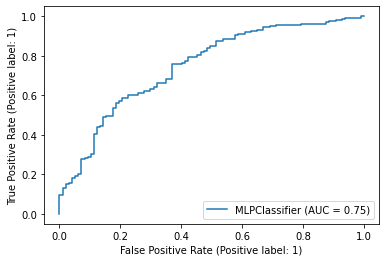

In [7]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(mlp, X_test_scaled, y_test)
roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:,1])

In [12]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

parameters = {'hidden_layer_sizes':[10,30,50,100] ,
              'solver': ['sgd', 'adam'], 
              'activation' : ['tanh','relu'],
             'max_iter' : [1000]}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid = parameters, cv = 5)
grid_mlp.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_mlp.cv_results_['params'])
result['mean_test_score'] = grid_mlp.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

,activation,hidden_layer_sizes,max_iter,solver,mean_test_score
6,tanh,100,1000,sgd,0.762857
10,relu,30,1000,sgd,0.761429
2,tanh,30,1000,sgd,0.758571
14,relu,100,1000,sgd,0.758571
4,tanh,50,1000,sgd,0.757143
12,relu,50,1000,sgd,0.747143
8,relu,10,1000,sgd,0.742857
15,relu,100,1000,adam,0.742857
0,tanh,10,1000,sgd,0.742857
5,tanh,50,1000,adam,0.735714


0.8073231425524351

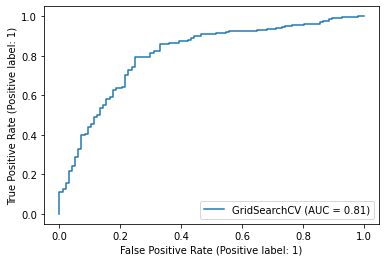

In [13]:
plot_roc_curve(grid_mlp, X_test_scaled, y_test)
roc_auc_score(y_test,grid_mlp.predict_proba(X_test_scaled)[:,1])

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, grid_mlp.predict(X_test_scaled))

array([[ 44,  53],
       [ 17, 186]], dtype=int64)